In [44]:
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as numpy
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
import numpy as np

In [45]:
data = load_iris()

In [49]:
# le = preprocessing.LabelEncoder()

# sepal_length = list(data["sepal_length"])
# sepal_width = list(data["sepal_width"])
# petal_length = list(data["petal_length"])
# petal_width = list(data["petal_width"])
# cls = le.fit_transform(list(data["class"]))

In [48]:
X = data.data
y = data.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.05)

model = KNeighborsClassifier(n_neighbors=9)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

1.0


In [51]:
predicted = model.predict(x_test)

names = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], ", Data: ", x_test[x], "Actual: ", names[y_test[x]])

Predicted:  Iris-setosa , Data:  [5.6 2.5 3.9 1.1] Actual:  Iris-setosa
Predicted:  Iris-versicolor , Data:  [6.5 3.  5.2 2. ] Actual:  Iris-versicolor
Predicted:  Iris-setosa , Data:  [6.3 3.3 4.7 1.6] Actual:  Iris-setosa
Predicted:  Iris-virginica , Data:  [5.  3.6 1.4 0.2] Actual:  Iris-virginica
Predicted:  Iris-setosa , Data:  [4.9 2.4 3.3 1. ] Actual:  Iris-setosa
Predicted:  Iris-versicolor , Data:  [6.3 2.7 4.9 1.8] Actual:  Iris-versicolor
Predicted:  Iris-virginica , Data:  [5.2 4.1 1.5 0.1] Actual:  Iris-virginica
Predicted:  Iris-virginica , Data:  [5.1 3.8 1.5 0.3] Actual:  Iris-virginica


(150, 2)
(150,)
(220, 280)
(220, 280)
[1 1 1 ... 2 2 2]
61600
(61600, 2)


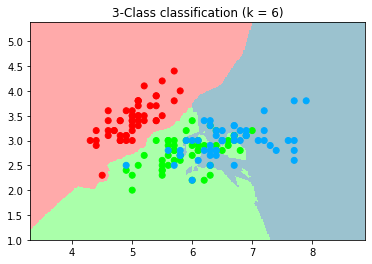

In [33]:
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as numpy
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
import numpy as np
n_neighbors = 6

# import some data to play with
iris = load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

print(X.shape)
print(y.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#9bc2cf'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# print(len(X)) 150
# print(len(y)) 150

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

print(xx.shape)
print(yy.shape)

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
print(len(Z))
print(np.c_[xx.ravel(), yy.ravel()].shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()